In [1]:
#installs
!pip install -q ultralytics

In [2]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

ambiente = 'local' # cambiar a 'kaggle' o 'colab' según el entorno

if ambiente == 'kaggle':
    dataset_path = '/kaggle/input/nohelmetnet/dataset'
elif ambiente == 'local':
    dataset_path = '../dataset'
data_yaml = os.path.join(dataset_path, 'data.yaml')

In [3]:
data_yaml

'../dataset\\data.yaml'

In [ ]:
# Carga modelo base (puedes usar yolov8n.pt, yolov8s.pt, etc.)
model = YOLO('yolov8n.pt')  # o yolov8s.pt según la capacidad

# Entrena (fine-tune)
model.train(
    data=data_yaml,
    epochs=15,
    imgsz=640,
    batch=16,
    project='yolo_train',
    name='exp',
    exist_ok=True
)

In [ ]:
metrics = model.val()
print(metrics)

In [4]:
# cargar modelo
model = YOLO('../results/yolo_train/exp/weights/best.pt')

In [9]:
# Predice sobre una imagen de prueba
results = model.predict(source=f"{dataset_path}/images/val/mandalay_1_1_001.jpg", save=True)


image 1/1 d:\GIT\NoHelmetNet\src\..\dataset\images\val\mandalay_1_1_001.jpg: 384x640 4 DHelmets, 84.4ms
Speed: 5.9ms preprocess, 84.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


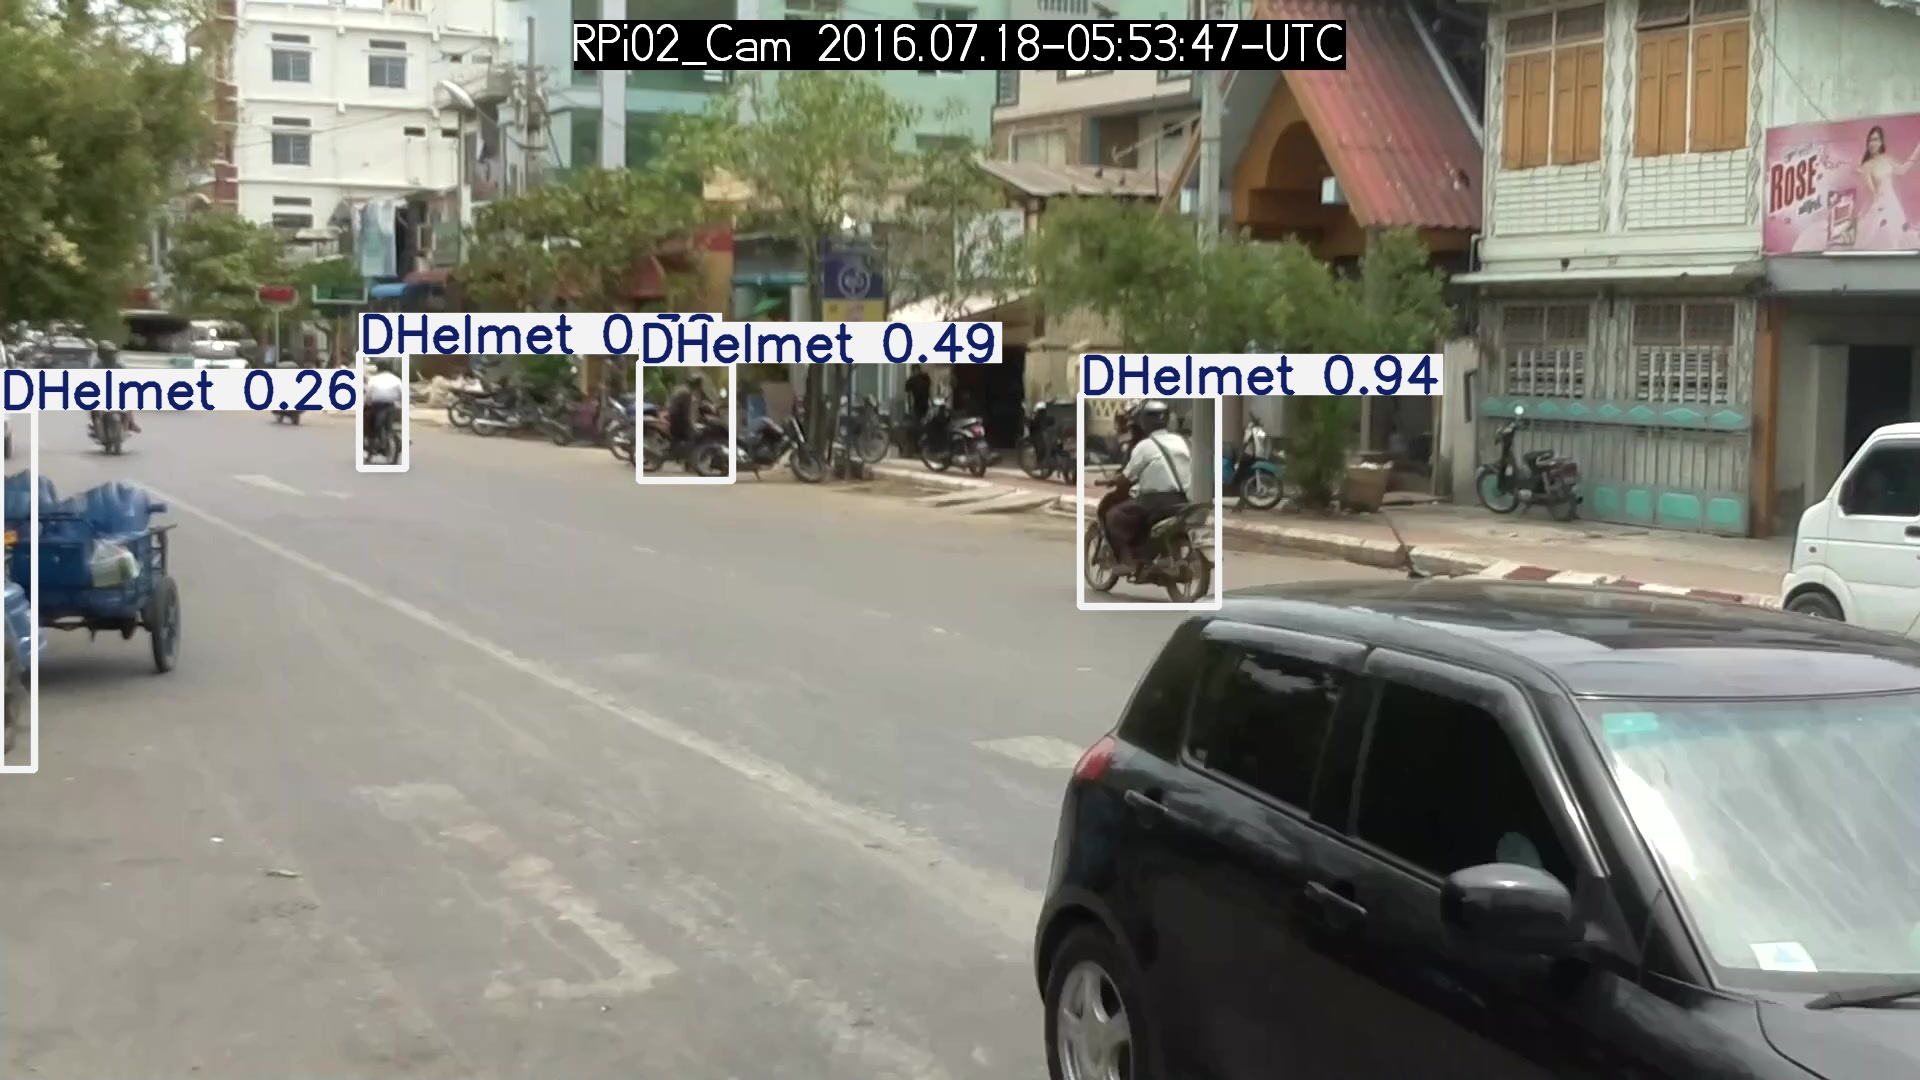

In [10]:
if ambiente == 'local':
    display(Image(filename='runs/detect/predict/mandalay_1_1_001.jpg'))

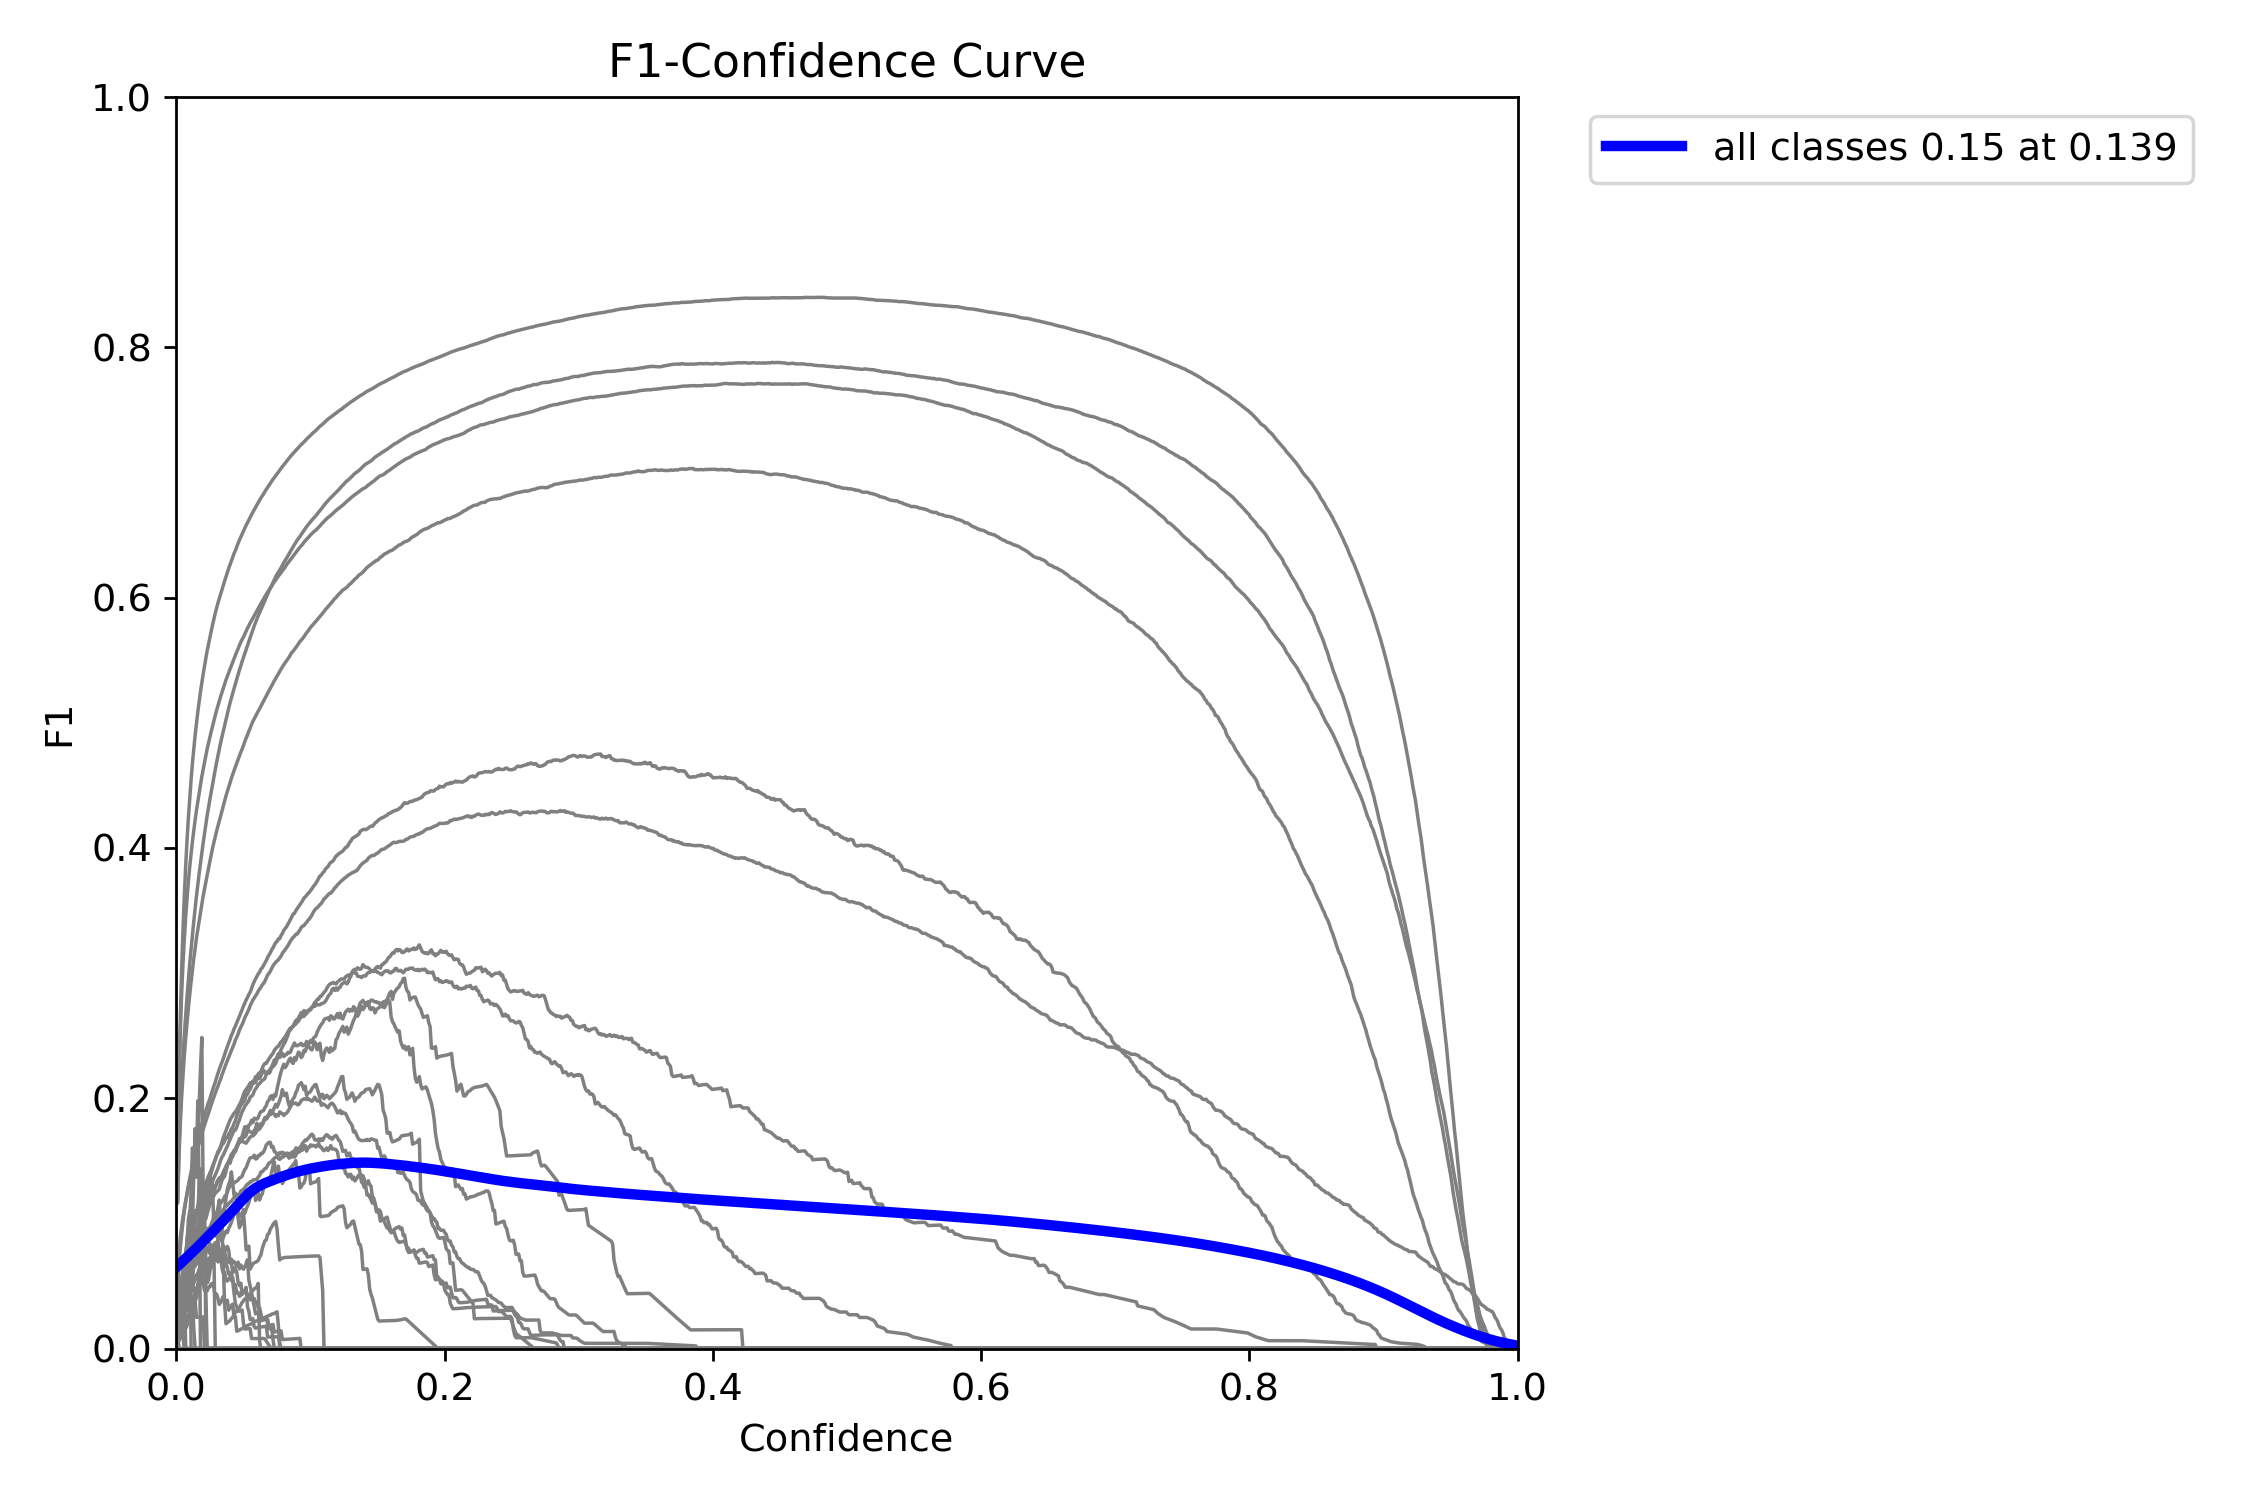

In [13]:
if ambiente == 'local':
    display(Image(filename='../results/yolo_train/exp/F1_curve.png'))